Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [8]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
# df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zoo.csv")
scores=[]
df=pd.read_csv("zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Number of rows of each class type

In [9]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

Random Forest

In [10]:
x=df.drop(["animal_name","class_type"], axis=1)
y=df['class_type']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
model=RandomForestClassifier(5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

RFaccuracy=accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
print("Random Forest Accuracy: ", RFaccuracy)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

   micro avg       0.95      1.00      0.98        20
   macro avg       0.93      1.00      0.96        20
weighted avg       0.97      1.00      0.98        20

Random Forest Accuracy:  0.9523809523809523


Correlated Feature Removal

{'eggs', 'milk'}

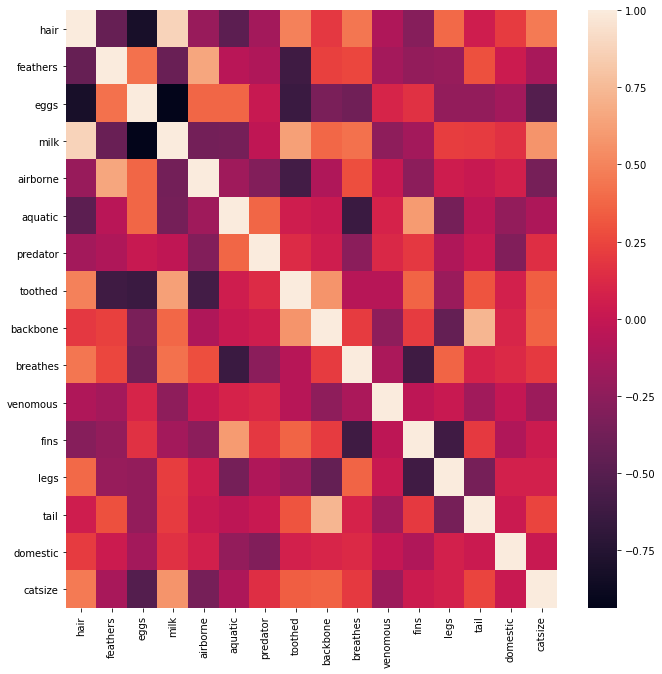

In [11]:
correlated_features = set()
correlation_matrix = x.corr()
plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix)
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

In [22]:
x.drop(labels=correlated_features, axis=1, inplace=True)

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
model=RandomForestClassifier(5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

RFaccuracy=accuracy_score(y_test, y_pred)

In [14]:
print("Random Forest Accuracy: ", RFaccuracy)

Random Forest Accuracy:  0.9523809523809523


Neural Network


In [15]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

x=df.drop(["animal_name","class_type"], axis=1)
y=df['class_type']

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

y_train.unique()
y_train=pd.get_dummies(y_train, columns=['class_type'])

In [27]:
len(y_train)

80

In [28]:
len(y_test)

21

In [16]:
normalizer=tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

pModel=tf.keras.Sequential()
pModel.add(normalizer)
pModel.add(tf.keras.layers.Dense(8, activation='relu', input_dim=16))
pModel.add(tf.keras.layers.Dense(8, activation='relu'))
pModel.add(tf.keras.layers.Dense(7, activation='softmax'))

pModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pModel.summary()
pModel.fit(x_train, y_train, batch_size=10, epochs=70)

x_train, x_test, y_train, y_test_PM=train_test_split(x, y, test_size=0.2, random_state=42)
y_pred_test=pModel.predict(x_test)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 16)               33        
 n)                                                              
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 304
Trainable params: 271
Non-trainable params: 33
_________________________________________________________________
Epoch 1/70
8/8 [==============================] - 2s 8ms/step - loss: 2.4307 - accuracy: 0.0500
Epoch 2/70
8/8 [===========

In [23]:
len(y_test)

21

In [24]:
len(y_pred_test)

21

In [17]:
n=[]
for i in y_pred_test:
    n.append(np.argmax(i)+1)

MLPaccuracy=accuracy_score(y_test_PM, n)
print("Neural Network Accuracy: ",MLPaccuracy)

Neural Network Accuracy:  0.9523809523809523


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_PM,n))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


Decision Tree

0.9523809523809523


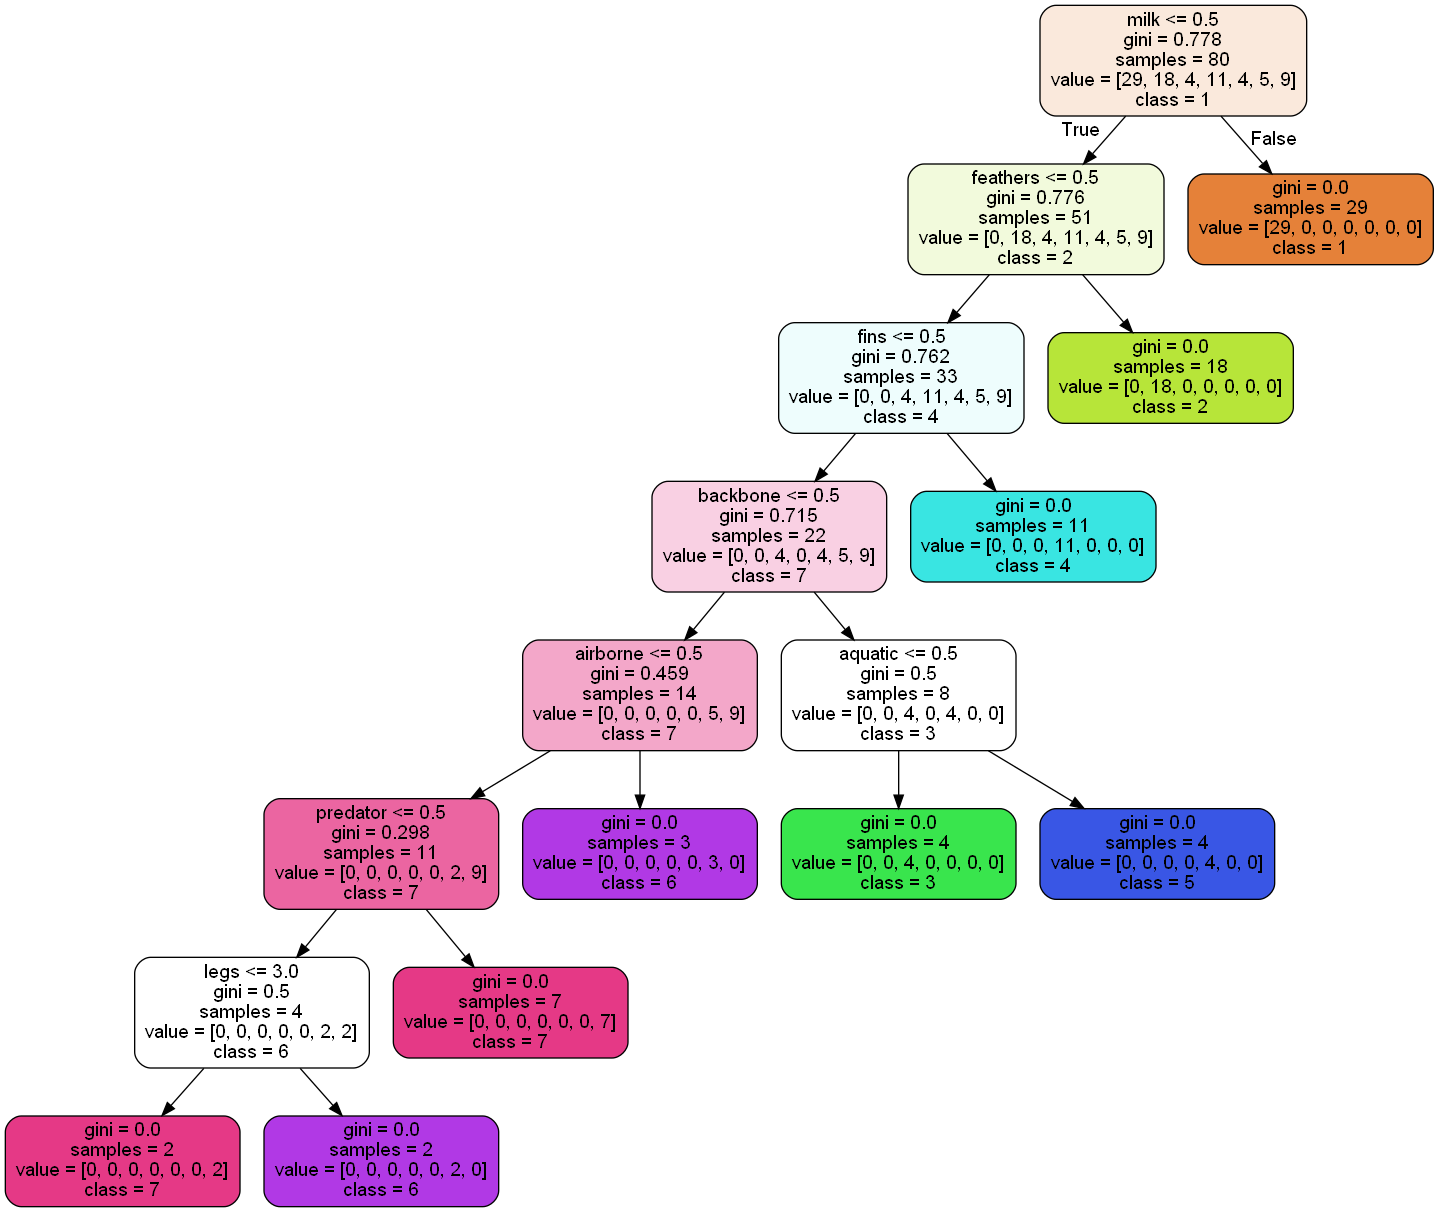

In [19]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cf=DecisionTreeClassifier(random_state=0, criterion='gini')
cf.fit(x_train, y_train)

y_pred=cf.predict(x_test)
tree=[]
tree=cf
#scores.append(accuracy_score(y_pred, y_test))
DTaccuracy=accuracy_score(y_pred, y_test)
print(DTaccuracy)
dot_data=export_graphviz(tree, filled=True, rounded=True, class_names=["1","2","3","4","5","6","7" ], feature_names=x.columns, out_file=None) 
graph=graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  1]]


Comparision of Models

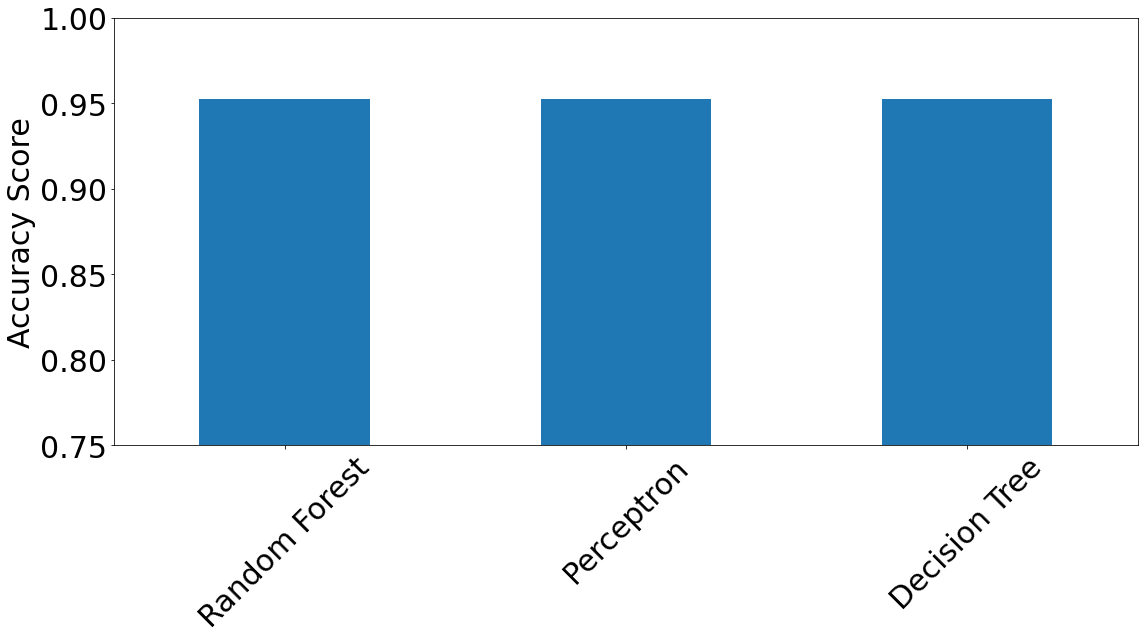

In [21]:
scores.append(RFaccuracy)
scores.append(MLPaccuracy)
scores.append(DTaccuracy)
accuracy_scores = pd.Series(scores, ['Random Forest', 'Perceptron', 'Decision Tree'])
accuracy_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30)

plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
plt.tight_layout()
plt.show()

#Conclusion

It is observed that Random Forest and Decision Tree have a high accuracy compared to MLP. This can be due to the lack of enough training samples to train the Neural Network while Random Forest and Decision Tree do not need as many training samples to learn patterns in the dataset.
